In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import pickle
import seaborn as sns
# %%
# %%
# File path
# %%
f_path = 'sim_result'
base_path = os.getcwd()
#base_path = os.path.dirname(__file__)

# File path & Classification

In [2]:
# %%
# go to the directory and read all data
# And Classify them
# %%
os.chdir(base_path)
os.chdir(f_path)
fnam_list = os.listdir()

pkl_list = []
txt_list = []
other_list =[]
for fff in fnam_list:
    if fff[-4:] == '.txt':
        txt_list.append(fff)
    elif fff[-4:] == '.pkl':
        pkl_list.append(fff)
    else:
        other_list.append(fff)
print('Exceptional files (no pickle no txt)')
print(other_list)
os.chdir(base_path)

# %%
# Function for text to input variable
# %%
txt_tmp = txt_list[0]
print(txt_tmp)

def txt2vk(txt_tmp):
    i_v_start = -1
    for ii, tt in enumerate(txt_tmp):
        if tt == 'v':
            i_v_start = ii + 1
        elif tt == 'k':
            i_v_end =  ii -1
            i_k_start = ii +1
        elif tt == '.':
            i_k_end = ii
    if i_v_start < -0.001:
        return False, False
    v_re = float(txt_tmp[i_v_start:i_v_end])
    k_re = float(txt_tmp[i_k_start:i_k_end])
    return v_re, k_re
    
v_test,k_test = txt2vk(txt_tmp)
print(v_test)
print(k_test)
# %%
# List up all inputs
v_set = set([])
k_set = set([])
input_list= []

for txtt in txt_list:
    v_tmp, k_tmp = txt2vk(txtt)
    if type(v_tmp) == type(False):
        continue
    v_set.add(v_tmp)
    k_set.add(k_tmp)
    input_list.append([v_tmp, k_tmp])
v_list = list(v_set)
v_list.sort()
k_list = list(k_set)
k_list.sort()

print(v_list)
print(k_list)

di_CPUmin = {}
di_CPUmin['MTC (1/s)'] = k_list
 
#print(input_list)

Exceptional files (no pickle no txt)
[]
res_lin2024-08-28_v0.002_k1e-06.txt
0.002
1e-06
[0.002, 0.005]
[1e-07, 1e-06]


# Crop the data

In [3]:
os.chdir(base_path)
os.chdir(f_path)

CPU_minu_list = []
ind_list = []

CPU_minu_mat = np.zeros([len(v_list),len(k_list)])

for ff,inpp in zip(txt_list, input_list):
    r = open(ff,'r')
    line1 = r.readline()
    line2 = r.readline()
    #print(line1)
    #print(line2)
    ii_end = 0
    for ii,ll in enumerate(line2):
        if ll=='m' or ll=='s':
            ii_end = ii-1
    #print(line2[:ii_end])
    r.close()

    CPUtime_tmp = float(line2[:ii_end])
    CPU_minu_list.append(CPUtime_tmp)
    for ii, vv in enumerate(v_list):
        if inpp[0] == vv:
            i_locate = ii
            break
    for jj, kk in enumerate(k_list):
        if inpp[1] == kk:
            j_locate = jj
            break
    ind_list.append([i_locate, j_locate])
    CPU_minu_mat[i_locate, j_locate] = CPUtime_tmp

countt = 0
for vv, cpuu in zip(v_list, CPU_minu_mat):
    di_CPUmin['v=' + str(vv)] = cpuu
df_CPUmin = pd.DataFrame(di_CPUmin)
df_CPUmin.set_index(keys=['MTC (1/s)'], inplace=True, drop=True)
print(df_CPUmin)
os.chdir(base_path)


               v=0.002   v=0.005
MTC (1/s)                       
1.000000e-07  0.051658  0.058681
1.000000e-06  0.062132  0.050869


# Pickle to Convergence

In [4]:
def pkl2vk(pkl_tmp):
    pkl_re= pkl_tmp.replace('pkl',' ')
    i_v_start = -1
    for ii, tt in enumerate(pkl_re):
        if tt == 'v':
            i_v_start = ii + 1
        elif tt == 'k':
            i_v_end =  ii -1
            i_k_start = ii +1
        elif tt == '.':
            i_k_end = ii
    if i_v_start < -0.001:
        return False, False
    v_re = float(pkl_tmp[i_v_start:i_v_end])
    k_re = float(pkl_tmp[i_k_start:i_k_end])
    return v_re, k_re

# %%

def pkl2conv(pkl_tmp):
    f = open(pkl_tmp, 'rb')
    y_res = pickle.load(f)
    y_sample = y_res[-10, 2]
    conv_bool = True
    if y_sample < 0.001:
        conv_bool = False
    f.close()
    return conv_bool


# Crop Convergence Data

In [5]:
os.chdir(base_path)
os.chdir(f_path)
fnam_pkl_tmp = pkl_list[0]
pkl_conv_test = pkl2conv(fnam_pkl_tmp)
print('pkl2conv test:')
print(pkl_conv_test)

CONV_mat = np.zeros([len(v_list),len(k_list)])
di_CONV = {}
di_CONV['MTC (1/s)'] = k_list

CONV_list = []
ind_list_pkl = []

input_list_pkl = []
v_set = set([])
k_set = set([])
for pkk in pkl_list:
    v_tmp, k_tmp = pkl2vk(pkk)
    if type(v_tmp) == type(False):
        continue
    v_set.add(v_tmp)
    k_set.add(k_tmp)
    input_list_pkl.append([v_tmp, k_tmp])

for pkk,inpp in zip(pkl_list, input_list_pkl):
    conv_tmp = pkl2conv(pkk)

    CONV_list.append(conv_tmp)
    for ii, vv in enumerate(v_list):
        if inpp[0] == vv:
            i_locate = ii
            break
    for jj, kk in enumerate(k_list):
        if inpp[1] == kk:
            j_locate = jj
            break
    ind_list_pkl.append([i_locate, j_locate])
    CONV_mat[i_locate, j_locate] = conv_tmp

for ii, vv in enumerate(v_list):
    di_CONV['v='+str(vv)] = CONV_mat[ii,:]
df_CONV = pd.DataFrame(di_CONV)
df_CONV.set_index(keys='MTC (1/s)', inplace=True, drop=True)
print(CONV_mat)
os.chdir(base_path)

pkl2conv test:
True
[[1. 1.]
 [1. 1.]]


In [6]:
# Average Comp Time
CPU_av = np.sum(np.sum(CPU_minu_mat*CONV_mat))
Toto = np.sum(np.sum(CONV_mat))
print(CPU_av/Toto)

0.055834999999999996


# Heatmap for CPU time

Text(0.5, 1.0, 'CPU time (s)')

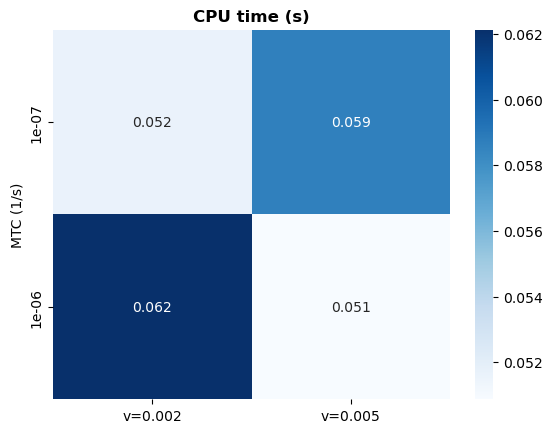

In [7]:
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import LogNorm, Normalize

#sns.heatmap(df_CPUmin, annot=True, fmt='.3f',
#            cmap = sel_colmap, norm = LogNorm(),
#            cbar = True
#            )

sns.heatmap(df_CPUmin, annot=True, fmt='.3f',
            cmap = 'Blues',
            cbar = True, 
            )
plt.title('CPU time (s)', fontweight = 'bold')

In [8]:
print(list(range(0,2,1)))

sel_col = ['#ba001e','#d80019','#f32b1d','#ff502b','#ff7c3c','#ffa84e','#ffcb6c','#ffe992','#fcfeb3','#e4f693','#c6ea74','#a0de5c','#68cb57','#39be56','#00b14d','#00893e','#006b31']

[0, 1]


Text(0.5, 1.0, 'Success of Simulatoins')

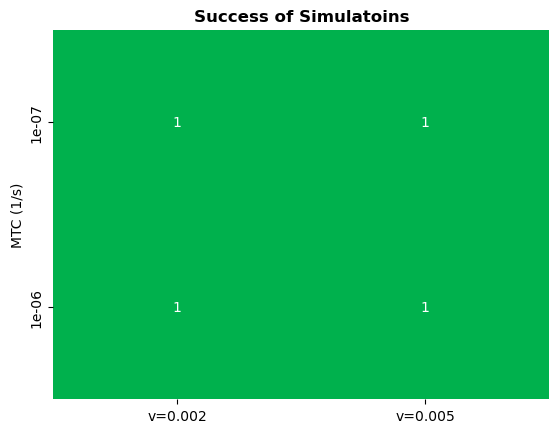

In [9]:
sel_col = ['#ba001e','#00b14d']
sel_colmap = ListedColormap(sel_col)
#sel_colmap = ListedColormap(sel_col)
sel_norm = list(range(0, 2, 1))
sel_norm = BoundaryNorm(sel_norm, ncolors=len(sel_col))
sns.heatmap(df_CONV, annot=True, cbar = False,
            cmap =sel_colmap, norm = sel_norm)
plt.title('Success of Simulatoins',fontweight= 'bold')

In [10]:
np.sum(CONV_mat)

4.0

In [19]:
print('[[Overall Resulst]]')
arr_CPU = df_CPUmin.mean()
CPU_ave = arr_CPU.mean()
print('Average CPU time (s):\n', CPU_ave)
CPU_ave_conv = np.mean(CONV_mat*CPU_minu_mat)
CPU_ave_dive = np.mean((1-CONV_mat)*CPU_minu_mat)
N_conv = np.sum(CONV_mat)
N_dive = np.sum(1-CONV_mat)
if N_conv < 0.2:
    CPU_ave_conv = '<No converging simulations.>'
if N_dive < 0.2:
    CPU_ave_dive = '<All simulatoins are converged.>'

print()
print('Number of Converged Simul. :')
print(int(N_conv))
print('Number of Diverging Simul. :')
print(int(N_dive))
print()
print("Average CPU time for Conve. case:")
print(CPU_ave_conv)
print("Average CPU time for Diver. case:")
print(CPU_ave_dive)

[[Overall Resulst]]
Average CPU time (s):
 0.055834999999999996

Number of Converged Simul. :
4
Number of Diverging Simul. :
0

Average CPU time for Conve. case:
0.055834999999999996
Average CPU time for Diver. case:
<All simulatoins are converged.>
